In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
inspector = inspect(engine)
# columns = inspector.get_columns('Station')
# for c in columns:
#     print(c['name'], c["type"])
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

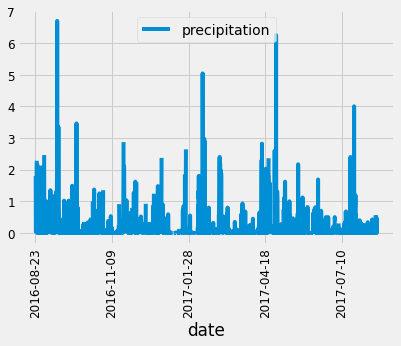

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
cur_year = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set
prev_year = cur_year - dt.timedelta(days = 365)
prev_year
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'],inplace = True)
# print(df.to_string(index=False))
df = df.sort_index()
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot='vertical',fontsize = 12)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

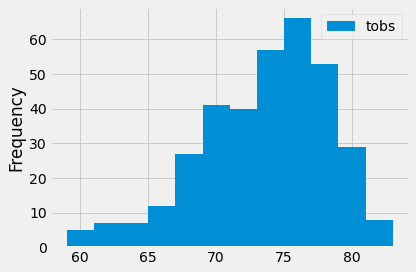

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station =='USC00519281').\
filter(Measurement.date >=prev_year).all()
df_station = pd.DataFrame(results,columns = ['tobs'])
df_station.plot.hist(bins=12)
plt.tight_layout()

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(st_date, end_date):
    minimum = session.query(func.min(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d',Measurement.date)>= st_date,func.strftime('%Y-%m-%d',Measurement.date)<= end_date).all()
    maximum = session.query(func.max(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d',Measurement.date)>= st_date,func.strftime('%Y-%m-%d',Measurement.date)<= end_date).all()
    average = session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime('%Y-%m-%d',Measurement.date)>= st_date,func.strftime('%Y-%m-%d',Measurement.date)<= end_date).all()
    length = len(session.query(Measurement.tobs).\
    filter(func.strftime('%Y-%m-%d',Measurement.date)>= st_date,func.strftime('%Y-%m-%d',Measurement.date)<= end_date).all())
    return minimum, maximum, average,length
calc_temps('2017-06-23', '2017-07-23')

([(69.0,)], [(87.0,)], [(77.984375,)], 192)

# Challenge

In [20]:
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [21]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [23]:
test = session.query(Measurement.date).\
    filter((Measurement.date>'2016-08-23') & (Measurement.date<'2017-06-23')).order_by(Measurement.date).all()
test

[('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09-01',),
 ('2016-09

In [26]:
import datetime as dt
print (dt.date.today())

2022-02-26


In [27]:
print(dt.date(2017,10,8))

2017-10-08


In [ ]:
d = dt.date(input("what is the date")).strftime('%Y-%m-%d')

In [ ]:
date_str = input(f"What is the date:")

In [ ]:
date_str

In [ ]:
session.query(Measurement.date).\
filter(func.strftime('%Y-%m-%d',Measurement.date) == date_str).all()